  EDA: Current project 32 unique users. Plot out Distribution of number tweets for each user. 
  
  Bar plot for distribution of number tweets per user.

Height of bar should be number of tweets they have.
 
 Some users have less than 100 tweets, drop these users.Drop less than 10k users. 
 
 Further look at userid, and tweet text. Look at text part and then figure process(bag of 
 
 words)
 
 Use this as X. Use this in train test split.
 
 Try first naive bayes model in skilearn for labels. Then print out metrics.
 
 after:
 Decision Tree simple(default parameters)
 
 Gausian Bayes:
 
 Look into what it actually does
 
 then calculate accuracy score.
 
 Use cross validation. Five folds. 
 
 If you need go back to lecture(solution in solution sheet for how to do all this).
 
 Don't use max features
 
 Look into functions. Understand what expected output should be.
 
 Learn Acronyms.
  
  In guide sent by flora, replace count vectorizer with tfidf. 
  
  if i have time, look at Naive Bay. Multiclass?
  
  y = must be string or object
  
  
  
  
Go back to NLP week and try and do assignment. Individual and pair assignment and compare to 

solution.  
  
  Floras last words:
  
  Be patient and go deep. Make sure each step, "what am I doing?"
  
  Always check. 'Wait a second let me check.'
  
  Use weekend pace yourself. Back up what you say. If you say you understand the topic 
  
  modeling understand everything. If you say you understand tfidf no the acronym. 
  
  Go back to lecture and really own it. "If asked to give lecture on Bayes, be able to, own 
  
  it".
  
  Saturday: 8pm. show what file worked on. 
  
  Flora: "why are they taking this step, why this assumption, purpose of this step?"
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import random
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tag import StanfordNERTagger
from nltk.tokenize import sent_tokenize
from nltk.tokenize import sent_tokenize


import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from nltk import word_tokenize, pos_tag
from nltk.tag import StanfordNERTagger
from sklearn.linear_model import RidgeClassifier
# from tweetokenize import Tokenizer


import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from nltk.tag.stanford import StanfordNERTagger
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import pandas as pd

import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#spell correction
from autocorrect import spell

import re
import matplotlib.pyplot as plt
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import pandas as pd
from nltk.util import skipgrams
from itertools import chain
from scipy.cluster import hierarchy


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alessandro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alessandro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load in Data

In [2]:
df = pd.read_csv('/Users/alessandro/Downloads/venezuela_201906_1_tweets_csv_hashed.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Inspecting userids

In [3]:
df.userid.value_counts()

568620329                                       43231
801485278858854401                              39421
801200139155214336                              34912
801555575687495681                              33503
801463213833547776                              32870
751630413769113601                              31657
751635009052827648                              31073
881675624401833984                              27436
761401522798333952                              27209
892133369965944833                              26370
769380097359024128                              26136
768237282562310144                              26020
896121971989262336                              25472
778257194076831744                              22624
741092772233482241                              16400
801221525718335488                              12618
772513370599747585                              12099
801442896041873409                              12025
741112500356276225          

In [4]:
df.user_screen_name.value_counts()

NoticiasViralTV                                 43231
EvelynWhiteGOP                                  39421
TrumpNewsz                                      34912
TrumpDailyNewss                                 33503
TrumpNewsDaily_                                 32870
AriaWilsonGOP                                   31657
CarolineWalkerB                                 31073
DTrumpTrain_                                    27436
AbbyMartinM                                     27209
Laureen4Trump                                   26370
TrumpTrainNewss                                 26136
GODBLESSAMERIC                                  26020
EmmaTurnerBN                                    25472
America4Trump_                                  22624
LaurenJonesGOP                                  16400
AlyssaNelsonR                                   12618
Sophia4Trump                                    12099
SamanthaClarkH                                  12025
SophiaMillerC               

In [5]:
len(df.user_screen_name)

569455

# Taking out retweets and non English tweets

In [6]:
tweets_mask = df['is_retweet'] == False
tweets = df[tweets_mask]

tweets_english = tweets[tweets['tweet_language'] == 'en']

# Dropping Users with less than 10,000 tweets

In [90]:
data = tweets_english[['user_screen_name','tweet_text']]
data =data[data.user_screen_name != 'CarolineWB_']
data =data[data.user_screen_name != '55DeTN4VJIeKfM9Atr0sSTLomZbJyUWuBNdDK2an1nE=']
data =data[data.user_screen_name != 'TDgi60XrT+ylS+rVJEMhb4Y2qzW2HnZmlijAyHNqavc=']
data =data[data.user_screen_name != '944Ry+vVZhaSln1T9ctgWQ6N5g45ReoWpWSXfrgKFc=']
data =data[data.user_screen_name != 'UaoSsTUDoR7SIA0dvPLYLRt70LG0VUSS3AcrE9FUE=']
data =data[data.user_screen_name != 'MUqZv6hxFW92V7lxJyf35c8BU8esdxS6IoV1QGiwwtQ=']
data =data[data.user_screen_name != 'TRUMPTRAIN_17']
data =data[data.user_screen_name != '_trumpnews_']
data =data[data.user_screen_name != 'EAMY+7SRc0r53i1vfKV4UvVAc+DAI4rtEpUjFSbwbQ=']
data =data[data.user_screen_name != 'AnnabelleBakerF']
data =data[data.user_screen_name != 'BreakingNewsDJT']
data =data[data.user_screen_name != 'Citizens4Trump_']
data =data[data.user_screen_name != 'NoticiasViralTV']







In [8]:
len(data.user_screen_name.value_counts())

20

In [9]:
data.user_screen_name.value_counts()

EvelynWhiteGOP     38879
TrumpNewsz         34665
TrumpNewsDaily_    32407
TrumpDailyNewss    32329
AriaWilsonGOP      31575
CarolineWalkerB    30999
AbbyMartinM        27102
TrumpTrainNewss    26058
GODBLESSAMERIC     25943
DTrumpTrain_       24839
Laureen4Trump      23566
America4Trump_     22543
EmmaTurnerBN       22206
LaurenJonesGOP     16297
AlyssaNelsonR      12590
Sophia4Trump       12065
SamanthaClarkH     12000
SophiaMillerC      11205
LaurenJonesGOP_    11068
OliviaAllenC        9969
Name: user_screen_name, dtype: int64

In [91]:
all_nighter = data

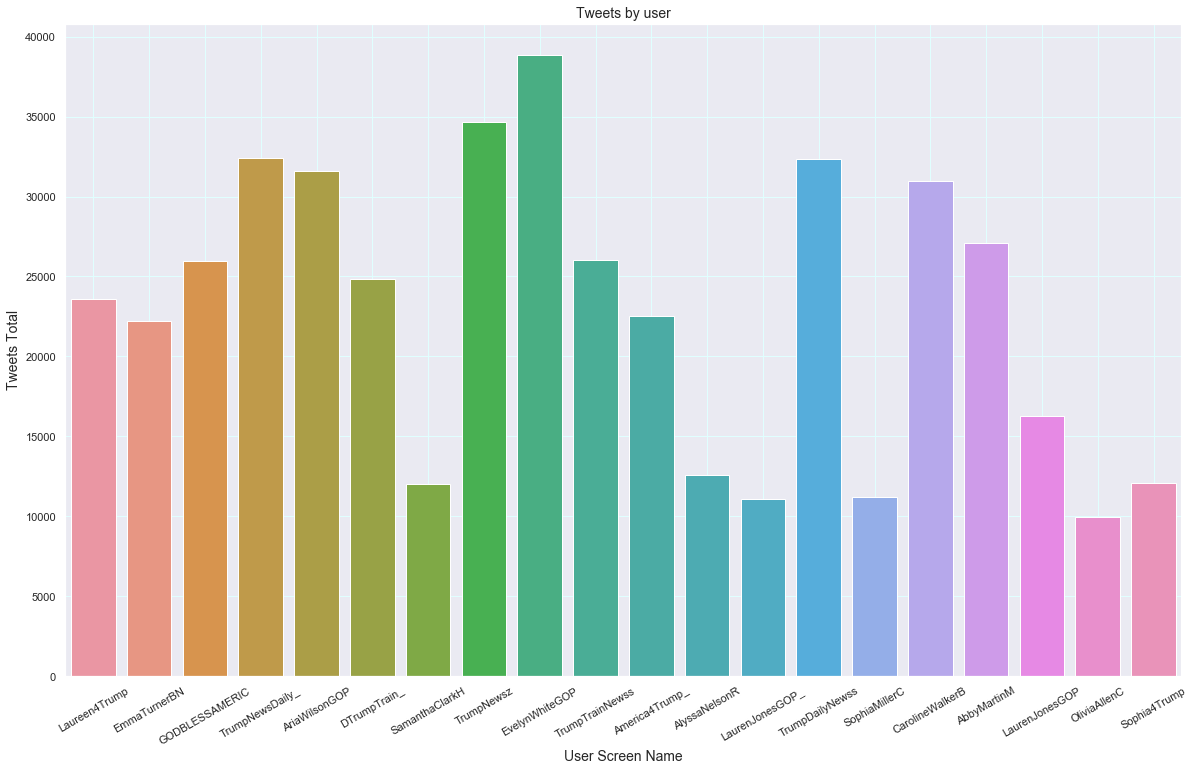

In [95]:
plt.figure(figsize=(20,12))
ax = sns.countplot(x='user_screen_name', data=data)
sns.set(style='darkgrid')

plt.ylabel('Tweets Total', fontsize = 14)
plt.xlabel('User Screen Name', fontsize = 14)
plt.title('Tweets by user', fontsize = 14)
plt.grid(c = 'lightcyan')

# import seaborn as sns
# planets = sns.load_dataset("planets")
# g = sns.factorplot("year", data=planets, aspect=1.5, kind="count", color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


plt.show ()

In [11]:
data_toy = data[:500]
data_toy

,user_screen_name,tweet_text
1,Laureen4Trump,"BREAKING: Air Force Makes Tragic Announcement,..."
2,Laureen4Trump,HAPPENING NOW: Disney Facing a Scandal So Cata...
3,EmmaTurnerBN,Another Stupid Gun Control Cartoon From the Le...
4,GODBLESSAMERIC,➡️ 90 POUNDS OF COCAINE FOUND ON SHIP OWNED BY...
5,GODBLESSAMERIC,"Michael Moore Offers to Pay $1,000 Fine for El..."
6,GODBLESSAMERIC,Nancy Pelosi to Continue to Lead House Democra...
7,GODBLESSAMERIC,WATCH: 9 Pro-Trump States Just DEFIED Illegal ...
8,GODBLESSAMERIC,"Stupid Hillary Gives Away Mosul Strategy, ISIS..."
9,GODBLESSAMERIC,HILLARY CLINTON ONE LAST HURRAH https://t.co/y...
10,GODBLESSAMERIC,Former CIA Director Said More Than 1 Country C...


# Processing Tweets to do Train Test Split

In [12]:
from autocorrect import spell


In [13]:



# data1 = []

# for i in range(data_toy.shape[0]):
#     tweet = data.iloc[i, 1]

#     # remove non alphabatic characters
#     tweet = re.sub('[^A-Za-z]', ' ', tweet)

#     # make words lowercase, because Go and go will be considered as two words
#     tweet = tweet.lower()

#     # tokenising
#     tokenized_tweet = wt(tweet)

#     # remove stop words and stemming
 
#     tweet_processed = []
#     for word in tokenized_tweet:
#         if word not in set(stopwords.words('english')):
#             tweet_processed.append(spell(stemmer.stem(word)))

#     tweet_text = " ".join(tweet_processed)
#     data1.append(tweet_text)


In [14]:
df.dropna(inplace=True)


In [15]:
data.shape

(458305, 2)

In [20]:
### Creating a function to clean_up the twitter_text
#### ALL WORKS!!!!
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

#Additional
import string
string.punctuation

# In this edit I didn't remove # and @ hoping to find the way to remove it together with the followings
punct = set(string.punctuation)
punct.remove('@')
punct.remove('#')


lemmer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

import preprocessor as p
import re

def preprocessing_text(text):
    '''
    INPUT: str
    OUTPUT: str w/ emojies, urls, hashtags and mentions removed
    '''
    p.set_options(p.OPT.EMOJI, p.OPT.URL, p.OPT.HASHTAG, p.OPT.MENTION, p.OPT.NUMBER)
    clean_text = p.clean(text)
    
    return clean_text

def remove_symbols(word, symbol_set):
    
    '''
    Removing symbols from word
    '''
    return ''.join(char for char in word 
                    if char not in symbol_set)
def clean_tweet_text(text_column):
    '''
    takes a columns in dataframe with tweets text: 
    Outputs: PD Series of tokenized docs
    lower case, 
    symbol_set charachters removed
    punctuation removed
    words stemmed and lemmatized
    
    '''
    
    
    # converting from pd to list
    corpus = text_column.values.tolist()
    
    #Removing all HTTPs
    docs_no_http = [ re.sub(r'https?:\/\/.*\/\w*', '', doc) for doc in corpus ]
    #First ---> tokenize docs
    tokenized_docs = [doc.split() for doc in docs_no_http]
    # Lower case words in doc
    tokenized_docs_lowered  = [[word.lower() for word in doc]
                                for doc in tokenized_docs]

    # Removing punctuation from docs
    cleaned_docs = [[remove_symbols(word, punct) for word in doc] 
                    for doc in tokenized_docs_lowered]

    ### Removing stop words
#     stop_words = set(nltk.corpus.stopwords.words('english'))
#     docs_no_stops = [[word for word in doc if word not in stop_words] 
#                      for doc in cleaned_docs]
    # Lemmatize words in docs
    docs_lemmatized = [[lemmer.lemmatize(word) for word in doc]
                      for doc in docs_no_stops]
    
    # Stem words in docs
    docs_stemmed = [[stemmer.stem(word) for word in doc]
                      for doc in docs_lemmatized]
    
    # Removes mentions, emotions, hashtags and emojies
    docs_no_mentions = [preprocessing_text(' '.join(doc)) for doc in docs_stemmed]
    
    bag = []
    for doc in docs_no_mentions:
        if len(doc) >= 2:
            bag.append(doc)
    
    # converts into list of lists
    bow = [list(tweet.split(' ')) for tweet in bag]
    
    
    # convert docs into pd series
    full_service_docs_series = pd.Series( (v[0] for v in bow) )
    
    return bag, bow, docs_stemmed, full_service_docs_series

In [17]:
tweet_full_bag_english, tweet_full_bow_english, tweet_full_docs_stemmed_english, tweet_english_full_service_doc_series = clean_tweet_text(data['tweet_text'])


NameError: name 'docs_no_stops' is not defined

In [ ]:
tweet_full_bag_english[:5]

In [21]:
print(X.shape)
print(y.shape)

NameError: name 'X' is not defined

In [22]:
def remove_symbols(word, symbol_set):
    
    '''
    Removing symbols from word
    '''
    return ''.join(char for char in word 
                    if char not in symbol_set)

In [23]:
import string

string.punctuation

punct = set(string.punctuation)
punct.remove('@')
punct.remove('#')


lemmer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

data['tweet_text'] = data['tweet_text'].apply(lambda x: x.lower())
data['tweet_text'] = data['tweet_text'].apply(lambda x: remove_symbols(x, punct))
data['tweet_text'] = data['tweet_text'].apply(lambda x: re.sub(r'https?:\/\/.*\/\w*', '', x))
data['tweet_text'] = data['tweet_text'].apply(lambda x: lemmer.lemmatize(x))
data['tweet_text'] = data['tweet_text'].apply(lambda x: stemmer.stem(x))

In [89]:
data_toy = data

In [ ]:
data.groupby('user_screen_name')

In [24]:
#count vectorizer
#not necessarily top words
#you get top words after you fit it, and get it there. This stage is dimensionality reduction
matrix = CountVectorizer(max_features=500)

In [ ]:
# >>> vectorizer = TfidfVectorizer()
# >>> X = vectorizer.fit_transform(corpus)
# >>> print(vectorizer.get_feature_names())
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
# >>> print(X.shape)
# (4, 9)

In [25]:
data.shape

(458305, 2)

In [26]:
X = matrix.fit_transform(data.tweet_text).toarray()

In [27]:
y = data.iloc[:, 0]

In [28]:
print(X.shape)
print(y.shape)

(458305, 500)
(458305,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [31]:
accuracy


0.06274383165905897

In [32]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)



In [33]:
cm

array([[  44,  341,  124,   21,   26,  108,   27,   20,   43,  194,  375,
         700,  694,  230, 1305, 2408,   23,   84,   21,    9],
       [  14,  236,   29,    7,   19,   52,   11,   10,   19,   91,   97,
         596,  429,  248,  386,  826,   12,   37,   11,    1],
       [  38,  233,  106,   15,   16,   76,   11,   21,   50,  163,  303,
         573,  689,  164, 1087, 1956,   15,   65,   17,    9],
       [  54,  519,  120,   29,   38,  115,   28,   35,   35,  179,  425,
         879,  823,  361, 1668, 2514,   23,   83,   23,    8],
       [  61,  456,  139,   23,   29,  103,   31,   26,   44,  191,  413,
         915,  807,  336, 1647, 2454,   23,   83,   36,   12],
       [  14,  227,   53,    8,    6,  354,  138,   94,   27,  890,  118,
         563,  666,  171,  497, 1853,   75,  328,   75,    4],
       [  13,  171,   45,    7,    9,  350,  104,   78,   36,  826,  114,
         489,  656,  126,  464, 1711,   69,  294,   78,    5],
       [  35,  410,   72,    8,   21,  47

In [34]:
cr

'                 precision    recall  f1-score   support\n\n    AbbyMartinM       0.08      0.01      0.01      6797\n  AlyssaNelsonR       0.05      0.08      0.06      3131\n America4Trump_       0.08      0.02      0.03      5607\n  AriaWilsonGOP       0.12      0.00      0.01      7959\nCarolineWalkerB       0.09      0.00      0.01      7829\n   DTrumpTrain_       0.09      0.06      0.07      6161\n   EmmaTurnerBN       0.08      0.02      0.03      5645\n EvelynWhiteGOP       0.15      0.02      0.03      9576\n GODBLESSAMERIC       0.07      0.01      0.01      6571\n  Laureen4Trump       0.10      0.13      0.11      5913\n LaurenJonesGOP       0.08      0.08      0.08      4121\nLaurenJonesGOP_       0.04      0.17      0.06      2767\n   OliviaAllenC       0.03      0.17      0.06      2485\n SamanthaClarkH       0.05      0.06      0.05      2992\n   Sophia4Trump       0.06      0.30      0.09      2941\n  SophiaMillerC       0.06      0.87      0.12      2774\nTrumpDailyN

In [35]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.06274383165905897

In [36]:
#TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)



In [37]:
X = vectorizer.fit_transform(data.tweet_text).toarray()

In [38]:
print(X.shape)
print(y.shape)

(458305, 1000)
(458305,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [41]:
accuracy

0.061469579409480085

In [42]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)


In [ ]:
cm

In [ ]:
cr

# Floras suggestion for handling this from here
1) try TfidfVectorizer instead of CountVectorizer. Think why?
2) limit to first predict the top two users, i.e., further reduce your dataset to the two users with the most tweets; and see about the accuracy.


# The Braulin way 
Because this is an unsupervised learning problem, I needed some way to validate the accuracy of my model. To do this, I took a user's entire comment history and randomly pulled out half of their comments, creating a new pseudo-user with these comments. Then I measured my model's success in being able to correctly match this pseudo-user back to the original user those comments were pulled from.

# Functions that I'll rework for my data

In [ ]:
# What is Filtered DF?
# The FilterDF is data with authors that have more than 400 comments. Groupby author with count of body.

# Split users into users and pseudo-users to compare them


In [ ]:
# I need help understanding what is going on here.



# Concatenate comments into corpora of each user's entire comment history
comments1 = df1.groupBy("author").agg(F.collect_list("body"))
join_comments_udf = udf(lambda x: ' '.join(x), StringType())
df1_join_comments = comments1.withColumn(
    'corpus', join_comments_udf(comments1['collect_list(body)']))

In [ ]:
def tokenize(s):
    s = s.lower()
    token = TweetTokenizer()
    return token.tokenize(s)

In [ ]:
def pos_tagger(s):
    return [i[1] for i in nltk.pos_tag(s)]

In [ ]:
def skip_grams(s):
    grams = []
    for i in skipgrams(s, 2, 2):
        grams.append(str(i))
    return grams

In [ ]:
# Open file containing the most common skip grams I had previously found from analyzing a previous sample
import csv

In [ ]:
with open('skip_grams.csv', 'r') as f:
    reader = csv.reader(f)
    com_skips = list(reader)

skips = com_skips[0]

# The Braulin Way

For my analysis, 150 of some of the most commonly used function words were used to identify user writing styles by the Delta method. The frequencies of each function word were recorded and then standardized by subtracting the mean and dividing by the standard deviation, giving each feature's value the representation of a z-score. The result is a 150-dimensional vector that is positive in a feature dimension where the author uses a word more frequently than the average user, and negative where it is used less than average. The vector of a pseudo-user can then be compared to that of each user most accurately by measure of cosine similarity.

In [ ]:
# random forest. gradient boosting classifier, partial dependency plot.

In [ ]:
len(data.user_screen_name)

In [123]:
filtered_df = data


# Making a pseudo user

In [125]:
Evelyn_df = filtered_df

In [94]:
# filtered_df = data
filtered_df =filtered_df[filtered_df.user_screen_name != 'OliviaAllenC']
filtered_df =filtered_df[filtered_df.user_screen_name != 'LaurenJonesGOP_']
filtered_df =filtered_df[filtered_df.user_screen_name != 'SophiaMillerC']
filtered_df =filtered_df[filtered_df.user_screen_name != 'SamanthaClarkH']
filtered_df =filtered_df[filtered_df.user_screen_name != 'Sophia4Trump']
filtered_df =filtered_df[filtered_df.user_screen_name != 'AlyssaNelsonR']
filtered_df =filtered_df[filtered_df.user_screen_name != 'LaurenJonesGOP']
filtered_df =filtered_df[filtered_df.user_screen_name != 'EmmaTurnerBN']
filtered_df =filtered_df[filtered_df.user_screen_name != 'America4Trump_']
filtered_df =filtered_df[filtered_df.user_screen_name != 'Laureen4Trump']
filtered_df =filtered_df[filtered_df.user_screen_name != 'DTrumpTrain_']
filtered_df =filtered_df[filtered_df.user_screen_name != 'GODBLESSAMERIC']
filtered_df =filtered_df[filtered_df.user_screen_name != 'TrumpTrainNewss']
filtered_df =filtered_df[filtered_df.user_screen_name != 'AbbyMartinM']
filtered_df =filtered_df[filtered_df.user_screen_name != 'CarolineWalkerB']
filtered_df =filtered_df[filtered_df.user_screen_name != 'AriaWilsonGOP']
filtered_df =filtered_df[filtered_df.user_screen_name != 'TrumpDailyNewss']
filtered_df =filtered_df[filtered_df.user_screen_name != 'TrumpNewsDaily_']
filtered_df =filtered_df[filtered_df.user_screen_name != 'TrumpNewsz']

# Making actual Pseudo Users

In [57]:
filtered_df.user_screen_name.value_counts()


EvelynWhiteGOP    38879
Name: user_screen_name, dtype: int64

In [80]:
# #The Braulin way
# comments1 = df1.groupBy("author").agg(F.collect_list("body"))


# Preprocessing Pseudo User Tweets

In [58]:
filtered_df['tweet_text'] = filtered_df['tweet_text'].apply(lambda x: x.lower())
# filtered_df['tweet_text'] = filtered_df['tweet_text'].apply(lambda x: remove_symbols(x, punct))
filtered_df['tweet_text'] = filtered_df['tweet_text'].apply(lambda x: re.sub(r'https?:\/\/.*\/\w*', '', x))
filtered_df['tweet_text'] = filtered_df['tweet_text'].apply(lambda x: lemmer.lemmatize(x))
filtered_df['tweet_text'] = filtered_df['tweet_text'].apply(lambda x: stemmer.stem(x))

In [62]:
filtered_df.shape


(38878, 2)

In [61]:
df.shape


AttributeError: 'NoneType' object has no attribute 'shape'

In [65]:
Pseudo, Original, Pseudo_y, Orignal_y = train_test_split(filtered_df.tweet_text, filtered_df.user_screen_name, test_size=.5)

# X_train, X_test, y_train, y_test = train_test_split(X, y)


In [66]:
print(len(Pseudo))
print(len(Original))

19439
19439


In [67]:
matrix = CountVectorizer(max_features=150)

In [68]:
Pseudo_y = [('Fake_Evelyn') for x in Pseudo_y]
len(Pseudo_y)

19439

In [69]:
Pseudo_y = pd.Series(Pseudo_y)

In [70]:
len(Pseudo_y)

19439

# The way I'm doing my split of the the user with with most tweets is to split between two users as as series (no labels) is the correct way?

In [71]:
X_df1 = matrix.fit_transform(Pseudo) # X =train = pseudo

In [72]:
X_df2 = matrix.fit_transform(Original) #X test = original

In [73]:
X_df1.shape

(19439, 150)

In [74]:
X_df2.shape


(19439, 150)

In [ ]:
# # Naive Bayes 
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train, y_train)

# # Predict Class
# y_pred = classifier.predict(X_test)

# # Accuracy 
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)

In [84]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_df1.todense(), Pseudo_y)

# Predict Class
y_pred = classifier.predict(X_df2.todense())

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Orignal_y, y_pred)

In [85]:
# # Naive Bayes 
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_df1.todense(), Pseudo_y)

# # Predict Class
# y_pred = classifier.predict(X_test)

# # Accuracy 
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, Pseudo_y)

# Compare pseudo entire corpus including original.



In [86]:
accuracy

0.0

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)


For my analysis, 150 of some of the most commonly used function words were used to identify user writing styles by the Delta method

In [ ]:
# at the very least a word cloud. 
# do you wanna go with pseudo users.
pseudo user, countvect, cosine similarity on 150 top standardized words. 
# 

In [ ]:
# Visualizations 
For each users, corpus and frequency of words used.
some type of frequency visualization.

take out stop words for frequency visualizations.

# Columns Braulin made for MCC (by concantenating all these dfs together):

1.a Df with A column with all comments joined.
2. a function that counts links, creates a df that counts links. concantenates it with last df.
3.builds a function that drops links, keeps column of counted links (len).
4.Does the same with bold formatting (two functions, count and drop bold formating, column of bold formatting remains)
5. Same with italics(two functions, count  and drop, keeps column)
6.has one that counts 'blocks', which appears to just be white space. drops the space. keeps column of count.
7. Does the same for headlines. 
8. does the same for newlines.
9. Only after all this does he tokenize.
8. Then he drops punctuation.
9.the he has a function that counts words. Has a lambda function that counts length of words. has a plot df that is ordered by total words

# MCC continued

1. MCCC1 = total_words_df1.select('author', 'word_lengths', 'total_words')
2. Then he iterates through this and creates a dictionary and empty list to make plots using word frequency.
# RMSE
1. then creates word RMSE dictionary
# Plots using Pandas

# Delta Model

1. First he makes sure all users have at least 400 values saves them in DF named Filter DF.
2. He then splits this filtered df in two. Df1, and Df2. Aka original and pseudo.
# Verify whether in fact he is combining all respective comments in data frames into One Corpus
3. For each respective DF he combines all tweets into one corpus column.
4. Creates count links column by the same process. 2 functions.
5. Then he tokenizes. Creates (a function for this).
6. Then he defines a part of speech tagger function. Calls it on Token column and creates new column Called 'POS'.
7. Then he defines a skip gram function. He applies skip gram function on 'POS' column and creates new column.
8. Then defines a Skip grams filter function. 
9. Then he Filters through each user's POS skip-grams and keep them if they are in the most commonly found skip-gram by defining a Skip grams filter function. Applies this to skip gram column. creates new column.
10.  Create stop words feature list and add extra features. (makes a column by calling his function on tokens.
11. Then he Concatenates each user's list of function words and skip grams to a single array. He builds a function to do this. So each user has an array associated with them containing stop words and skipgrams.
12. Then he creates a Count Vectorize the combined function word and skip gram array. For some reason he has 285 words/features. in a column called features, which is a concatenation of stop words and skip grams.
13. Then he Normalizes the counts so that they are a percentage of total counts of the features. He does this using some kind of function called Normalizer whos input_col is 'features' and output_col is 'features_norm'. 
14. Example of last step. tf_norm1 = Normalizer(inputCol="features", outputCol="features_norm", p=1).transform(tf1)
15. Then he Standardizes the vector based on average use of each feature among all users. 
     a. Example code of last step: stdscaler = StandardScaler(inputCol='features_norm', outputCol='scaled', withMean=True)
    b. scale_fit1 = stdscaler.fit(tf_norm1)    c. scaled1 = scale_fit1.transform(tf_norm1
17. From here he does the same thing for df2.
18. After everything is standardized and scaled then he Calculates the cosine similarity for each author in subset 1 against every author in subset 2.
How he does that:

    sims1 = scaled1.select('author', 'scaled')

    sims2 = scaled2.select('author', 'scaled')

    similarities = {}:

    for i in sims1.rdd.collect():
        similarity = {}
        auth1, vec1 = i[0], i[1]
        for j in sims2.rdd.collect():
            auth2, vec2 = j[0], j[1]
            cos = vec1.dot(vec2) / (vec2.norm(2)*vec1.norm(2))
            similarity[auth2] = cos
        similarities[auth1] = similarity
19. Then created df of similarities. pdf = pd.DataFrame(similarities)
20. Then he splits the cosines of authors who match with the authors who don't match
        
        cols = pdf.columns
        mask = []
        for i in pdf:
            mask.append(i == pdf.index)
        mask = np.array(mask)
        mask = mask.T

        matches = pdf.values[mask]
        non_matches = pdf.values[~mask]
21. Then calculates the accuracy of the model:

    non_mas = non_matches.reshape(len(matches), -1)
    non_mas_max = np.max(non_mas, axis=1)
    np.sum(matches > non_mas_max) / len(matches)
   
22. He then reads matches and non matches from csv.

    with open('nonmatches.csv', 'r') as f:
        reader = csv.reader(f)
        nonma_list = list(reader)

    with open('matches.csv', 'r') as f:
        reader = csv.reader(f)
        match_list = list(reader)

    match_list = [[float(x) for x in i] for i in match_list]
    match_list = match_list[0]

    nonma_list = [[float(x) for x in i] for i in nonma_list]
    nonma_list = nonma_list[0]
    
23. Then he calculates cosine threshold and power for a given alpha level:

    n = norm.ppf(0.9999) * np.std(nonma_list) - np.mean(nonma_list)

    1 - norm.cdf(n, np.mean(match_list), np.std(match_list))
    
24. Then he plots:
    # Dendogram
    sparkdf = scaled1.select('author', 'scaled')
    pandaDF = sparkdf.toPandas()
    series = pandaDF['scaled'].apply(lambda x: np.array(x.toArray())).as_matrix().reshape(-1, 1)
    features = np.apply_along_axis(lambda x: x[0], 1, series)
    df = pd.DataFrame(features, index=pandaDF['author'])

    threshold = 0.405
    Z = hierarchy.linkage(df, 'single', metric="cosine")
    hierarchy.set_link_color_palette(None)

    fig, axes = plt.subplots(1, 1, figsize=(15, 7))
    hierarchy.dendrogram(Z, ax=axes, color_threshold=threshold, labels=df.index)
    axes.axhline(y=0.405, color='r', linestyle='-', label='threshold')
    axes.set_ylabel('1 - Cosine')
    axes.set_title('Hierarchical Clustering')
    plt.tight_layout()
    plt.legend()

# Matches and non-matches hist

    plt.hist(matches, label='matches')
    plt.hist(non_matches, label='non-matches')
    plt.xlabel('Cosine Similarity')
    plt.legend()
    plt.savefig('match_distro.png')

# Probability Density
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(x, norm.pdf(x, np.mean(nonma_list), np.std(nonma_list)), label='non-matches')
    ax.fill_between(x, 0, norm.pdf(x, np.mean(nonma_list), np.std(nonma_list)), alpha=0.5)
    ax.plot(x, norm.pdf(x, np.mean(match_list), np.std(match_list)), label='matches')
    ax.fill_between(x, 0, norm.pdf(x, np.mean(match_list), np.std(match_list)), alpha=0.5)
    ax.set_title('Probability Density')
    ax.set_xlabel('Cosine Similarity')
    ax.legend()
    plt.savefig('prob_density.png')
   







In [93]:
all_nighter.user_screen_name.value_counts()

EvelynWhiteGOP     38879
TrumpNewsz         34665
TrumpNewsDaily_    32407
TrumpDailyNewss    32329
AriaWilsonGOP      31575
CarolineWalkerB    30999
AbbyMartinM        27102
TrumpTrainNewss    26058
GODBLESSAMERIC     25943
DTrumpTrain_       24839
Laureen4Trump      23566
America4Trump_     22543
EmmaTurnerBN       22206
LaurenJonesGOP     16297
AlyssaNelsonR      12590
Sophia4Trump       12065
SamanthaClarkH     12000
SophiaMillerC      11205
LaurenJonesGOP_    11068
OliviaAllenC        9969
Name: user_screen_name, dtype: int64

In [117]:
len(all_nighter.user_screen_name.value_counts())

20

In [ ]:
all_nighter

In [ ]:
Pseudo, Original, Pseudo_y, Orignal_y = train_test_split(filtered_df.tweet_text, filtered_df.user_screen_name, test_size=.5)


In [115]:
# result is a list object of two dfs
type(result)

list

In [140]:
SophiaMillerC = filtered_df

In [126]:
filtered_df

,user_screen_name,tweet_text
1,Laureen4Trump,"BREAKING: Air Force Makes Tragic Announcement,..."
2,Laureen4Trump,HAPPENING NOW: Disney Facing a Scandal So Cata...
3,EmmaTurnerBN,Another Stupid Gun Control Cartoon From the Le...
4,GODBLESSAMERIC,➡️ 90 POUNDS OF COCAINE FOUND ON SHIP OWNED BY...
5,GODBLESSAMERIC,"Michael Moore Offers to Pay $1,000 Fine for El..."
6,GODBLESSAMERIC,Nancy Pelosi to Continue to Lead House Democra...
7,GODBLESSAMERIC,WATCH: 9 Pro-Trump States Just DEFIED Illegal ...
8,GODBLESSAMERIC,"Stupid Hillary Gives Away Mosul Strategy, ISIS..."
9,GODBLESSAMERIC,HILLARY CLINTON ONE LAST HURRAH https://t.co/y...
10,GODBLESSAMERIC,Former CIA Director Said More Than 1 Country C...


# 1. EvelynWhiteGOP 

In [127]:
# filtered_df = data
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'OliviaAllenC']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'LaurenJonesGOP_']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'SophiaMillerC']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'SamanthaClarkH']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'Sophia4Trump']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'AlyssaNelsonR']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'LaurenJonesGOP']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'EmmaTurnerBN']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'America4Trump_']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'Laureen4Trump']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'DTrumpTrain_']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'GODBLESSAMERIC']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'TrumpTrainNewss']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'AbbyMartinM']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'CarolineWalkerB']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'AriaWilsonGOP']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'TrumpDailyNewss']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'TrumpNewsDaily_']
Evelyn_df =Evelyn_df[Evelyn_df.user_screen_name != 'TrumpNewsz']

In [191]:
Evelyn_1X, Evelyn_2x, Evelyn_1y, Evelyn_2y = train_test_split(Evelyn_df.tweet_text, Evelyn_df.user_screen_name, test_size=.5)


# 2. OliviaAllenC

In [131]:
# filtered_df = data
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'EvelynWhiteGOP']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'LaurenJonesGOP_']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'SophiaMillerC']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'SamanthaClarkH']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'Sophia4Trump']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'AlyssaNelsonR']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'LaurenJonesGOP']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'EmmaTurnerBN']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'America4Trump_']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'Laureen4Trump']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'DTrumpTrain_']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'GODBLESSAMERIC']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'TrumpTrainNewss']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'AbbyMartinM']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'CarolineWalkerB']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'AriaWilsonGOP']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'TrumpDailyNewss']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'TrumpNewsDaily_']
OliviaAllenC =OliviaAllenC[OliviaAllenC.user_screen_name != 'TrumpNewsz']

In [141]:
OliviaAllenC

,user_screen_name,tweet_text
312,OliviaAllenC,Family Makes History with What Their Baby Was ...
313,OliviaAllenC,Mad Cow Mariah Solo Stampede On Stage During N...
544,OliviaAllenC,‘Asian Grooming Gang’ Drugged and Raped Rother...
545,OliviaAllenC,Hilarious: Celebrity UNLOADS On Hollywood…Send...
918,OliviaAllenC,Donald Trump Takes The Travel Ban Dismissal To...
919,OliviaAllenC,Figures=&gt; #NeverTrumper Ben Sasse Defends S...
920,OliviaAllenC,BOOM: It’s Time for President Trumps 8th Week ...
921,OliviaAllenC,AG Jeff Sessions Suggest Openness To REVIEW Of...
959,OliviaAllenC,BREAKING – John McCain Caught Being BOUGHT By ...
960,OliviaAllenC,UPDATE: Killer in Berlin Christmas Market Atta...


In [195]:
Olivia1X, Olivia_2x, Olivia_1y, Olivia_2y = train_test_split(OliviaAllenC.tweet_text, OliviaAllenC.user_screen_name, test_size=.5)


# 3.LaurenJonesGOP_  

In [135]:
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'EvelynWhiteGOP']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'OliviaAllenC']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'SophiaMillerC']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'SamanthaClarkH']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'Sophia4Trump']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'AlyssaNelsonR']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'LaurenJonesGOP']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'EmmaTurnerBN']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'America4Trump_']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'Laureen4Trump']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'DTrumpTrain_']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'GODBLESSAMERIC']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'TrumpTrainNewss']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'AbbyMartinM']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'CarolineWalkerB']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'AriaWilsonGOP']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'TrumpDailyNewss']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'TrumpNewsDaily_']
LaurenJonesGOP =LaurenJonesGOP[LaurenJonesGOP.user_screen_name != 'TrumpNewsz']

In [159]:
LaurenJonesGOP

,user_screen_name,tweet_text
102,LaurenJonesGOP_,Man Who Claimed He Was Kicked Off Plane For Sp...
224,LaurenJonesGOP_,➡️ Judge Gorsuch Makes SURPRISE Move At Congre...
225,LaurenJonesGOP_,TRUMP: “WE MUST FIGHT THEM &amp; DEMS IN 2018”...
387,LaurenJonesGOP_,How Democrats Try To Get Out Of A Speeding Tic...
388,LaurenJonesGOP_,Sarah Palin SHOCKS America…Reveals STUNNING Tr...
622,LaurenJonesGOP_,▶️ BREAKING: Obamas Kicked Out Of Their Church...
623,LaurenJonesGOP_,SHE IS AWESOME! Everyone Is Talking About Ivan...
624,LaurenJonesGOP_,Trey Gowdy Just Did The IMPOSSIBLE! What A Leg...
625,LaurenJonesGOP_,ALERT – Melania’s College Professor Comes Forw...
626,LaurenJonesGOP_,"➡️ Bernie Sanders Buys Third House, Prompting ..."


In [196]:
LaurenJones1X, LaurenJones2x, LaurenJones1y, LaurenJones2y = train_test_split(LaurenJonesGOP_.tweet_text, LaurenJonesGOP_.user_screen_name, test_size=.5)


# 4.SophiaMillerC

In [199]:
SophiaMillerC = data[data.user_screen_name == 'SophiaMillerC']

In [200]:
SophiaMiller1X, SophiaMiller2x, SophiaMiller1y, SophiaMiller2y = train_test_split(SophiaMillerC.tweet_text, SophiaMillerC.user_screen_name, test_size=.5)


In [202]:
SophiaMiller2y

525496    SophiaMillerC
258483    SophiaMillerC
42184     SophiaMillerC
305851    SophiaMillerC
50602     SophiaMillerC
82670     SophiaMillerC
358173    SophiaMillerC
323282    SophiaMillerC
54297     SophiaMillerC
90100     SophiaMillerC
332500    SophiaMillerC
183801    SophiaMillerC
365301    SophiaMillerC
235238    SophiaMillerC
326716    SophiaMillerC
406440    SophiaMillerC
348991    SophiaMillerC
434528    SophiaMillerC
147572    SophiaMillerC
305148    SophiaMillerC
487263    SophiaMillerC
57401     SophiaMillerC
220228    SophiaMillerC
493901    SophiaMillerC
185621    SophiaMillerC
174162    SophiaMillerC
481603    SophiaMillerC
402218    SophiaMillerC
305854    SophiaMillerC
406959    SophiaMillerC
              ...      
304251    SophiaMillerC
48859     SophiaMillerC
18934     SophiaMillerC
239265    SophiaMillerC
491405    SophiaMillerC
374938    SophiaMillerC
184876    SophiaMillerC
60849     SophiaMillerC
104255    SophiaMillerC
332938    SophiaMillerC
453780    Sophia

# 5. SamanthaClarkH

In [146]:
 SamanthaClarkH = data[data.user_screen_name == 'SamanthaClarkH']

In [204]:
SamanthaClarkH_1X, SamanthaClarkH_2x, SamanthaClarkH_1y, SamanthaClarkH_2y = train_test_split(SamanthaClarkH.tweet_text, SamanthaClarkH.user_screen_name, test_size=.5)


In [147]:
SamanthaClarkH

,user_screen_name,tweet_text
49,SamanthaClarkH,WATCH: CNN Brings On Ben Stein To Talk About T...
256,SamanthaClarkH,"BREAKING: White House Just Went On LOCKDOWN, H..."
257,SamanthaClarkH,Farmer Sprays Poop on Trespassing Actress Emma...
258,SamanthaClarkH,Pissed Off Veterans Take Matters Into Their Ow...
330,SamanthaClarkH,BREAKING: 2 Repubs Just Turned On Trump https:...
331,SamanthaClarkH,"After slaughtering of Christians in Berlin, Tr..."
332,SamanthaClarkH,POLL: Should The Muslim Hijab Be Allowed In Th...
333,SamanthaClarkH,BREAKING: President Trump Makes DEVASTATING AN...
334,SamanthaClarkH,➡️ Denzel Washington SHUTS DOWN Meryl Streep a...
335,SamanthaClarkH,Trump Could Reverse Obama’s Order and Bring Ba...


# 6. Sophia4Trump

In [148]:
 Sophia4Trump = data[data.user_screen_name == 'Sophia4Trump']

Sophia4Trump

In [205]:
Sophia4Trump_1X, Sophia4Trump_2x, Sophia4Trump _1y, Sophia4Trump_2y = train_test_split(Sophia4Trump.tweet_text, Sophia4Trump.user_screen_name, test_size=.5)


In [207]:
Sophia4Trump_1y

112425    Sophia4Trump
97855     Sophia4Trump
341928    Sophia4Trump
254508    Sophia4Trump
263994    Sophia4Trump
442394    Sophia4Trump
539046    Sophia4Trump
396198    Sophia4Trump
69324     Sophia4Trump
24048     Sophia4Trump
268570    Sophia4Trump
503624    Sophia4Trump
454899    Sophia4Trump
173458    Sophia4Trump
74405     Sophia4Trump
291174    Sophia4Trump
87612     Sophia4Trump
501693    Sophia4Trump
300464    Sophia4Trump
264484    Sophia4Trump
195067    Sophia4Trump
52944     Sophia4Trump
479103    Sophia4Trump
423541    Sophia4Trump
116933    Sophia4Trump
336533    Sophia4Trump
444655    Sophia4Trump
350254    Sophia4Trump
161826    Sophia4Trump
473037    Sophia4Trump
              ...     
13498     Sophia4Trump
107097    Sophia4Trump
32408     Sophia4Trump
316605    Sophia4Trump
481266    Sophia4Trump
406890    Sophia4Trump
423343    Sophia4Trump
137957    Sophia4Trump
544466    Sophia4Trump
213026    Sophia4Trump
551265    Sophia4Trump
52938     Sophia4Trump
549558    S

# 7. AlyssaNelsonR

In [151]:
AlyssaNelsonR = data[data.user_screen_name == 'AlyssaNelsonR']

In [152]:
AlyssaNelsonR

,user_screen_name,tweet_text
91,AlyssaNelsonR,VIDEO : Trump Changed These American Lives Wit...
92,AlyssaNelsonR,BREAKING – Obama Admin Caught Hacking Election...
93,AlyssaNelsonR,BREAKING: Feminist Takes in “Refugee” to Prove...
542,AlyssaNelsonR,VIDEO : Sheriff Clarke Says Trump Could Nomina...
543,AlyssaNelsonR,FLORIDA RALLY : Trump Slams Dishonest Media “T...
820,AlyssaNelsonR,BREAKING : Foreigners Overstaying Visas Outnu...
821,AlyssaNelsonR,Trump is Right Again! The FBI is Investigating...
822,AlyssaNelsonR,SHOCK: Pope Francis Grants Sick Gift to Child ...
823,AlyssaNelsonR,BREAKING : Trump Proposes the “BIGGEST AND BES...
838,AlyssaNelsonR,WOW — Immigrants Are OUTRAGED Over This Employ...


In [208]:
AlyssaNelsonR_1X, AlyssaNelsonR_2x, AlyssaNelsonR_1y, AlyssaNelsonR_2y = train_test_split(AlyssaNelsonR.tweet_text, AlyssaNelsonR.user_screen_name, test_size=.5)


In [210]:
AlyssaNelsonR_1X

90263     BREAKING : Trump BLASTS Democrats and Media fo...
375805    THIS IS WAR! What Trey Gowdy Said On Live TV T...
165922    Rush Makes Shock Wiretap Discovery, IMMEDIATEL...
357474    French “Deradicalization Workshops” For Islami...
44540     JUST IN: Major Election Recount Has Ended, Sho...
489495    ➡️ QUESTION – Should Illegal Immigrant Who Rap...
554412    Another Russian Politician Has Been Assassinat...
306792    WATCH – ‘This Is What’s WRONG With Your Party!...
185349    BREAKING – Trump’s New Executive Order Has Rac...
70872     WikiLeaks Founder Breaks Silence On CNN, Hits ...
11111     BREAKING: Trump Exposes DNC For OBSTRUCTING FB...
270810    OH MY GOD! Obama Just SPIT IN THE FACE of Pear...
70044     VIDEO : Senator Tim Scott Reads Racist Tweets ...
366561    BREAKING VIDEO : CNN Cuts LIVE FEED When Presi...
36041     BREAKING : Mark Levin Urges Congress to Invest...
500939    The UN Security Council Has Just Officially Gi...
150000    BREAKING: Biden Turns His Back

# 8. LaurenJonesGOP aka LJG2

In [157]:
LJG2 = data[data.user_screen_name == 'LaurenJonesGOP']

In [158]:
LJG2

,user_screen_name,tweet_text
157,LaurenJonesGOP,"Fact-Check: No, Hillary Clinton Does Not Suppo..."
158,LaurenJonesGOP,Poll: Who Won the Third Presidential Debate? h...
159,LaurenJonesGOP,EVERYONE ---- VOTE!\n#RT #AmericaFirst #VoteTr...
170,LaurenJonesGOP,Liberals Are LIVID After Donald Trump Makes TH...
171,LaurenJonesGOP,POLL: Do You Trust Paul Ryan? https://t.co/3B4...
172,LaurenJonesGOP,WATCH: Question on Chelsea SETS HILLARY OFF… M...
173,LaurenJonesGOP,"Muslims Furious Over TRUTH On 9/11 Memorial, T..."
174,LaurenJonesGOP,"Stephen K. Bannon: Claims of Anti-Semitism, Ra..."
451,LaurenJonesGOP,QUESTION – Should Loretta Lynch Be JAILED For ...
452,LaurenJonesGOP,VIDEO : Muslim Liberal Woman Explains Why She ...


In [211]:
 LJG_1X, LJG_2x, LJG_1y, LJG_2y = train_test_split(LJG2.tweet_text, LJG2.user_screen_name, test_size=.5)


# 9. EmmaTurnerBN

In [160]:
EmmaTurnerBN = data[data.user_screen_name == 'EmmaTurnerBN']

In [161]:
EmmaTurnerBN

,user_screen_name,tweet_text
3,EmmaTurnerBN,Another Stupid Gun Control Cartoon From the Le...
950,EmmaTurnerBN,Trump just used Obama’s OWN WORDS to silence e...
951,EmmaTurnerBN,BREAKING: Democrat Arrested For Corruption – S...
952,EmmaTurnerBN,Secret Service investigating Antifa death thre...
953,EmmaTurnerBN,Judge Napolitano REVEALED Three Major Sources ...
954,EmmaTurnerBN,Mayor Bill de Blasio’s Criminal Justice Direct...
955,EmmaTurnerBN,(VIDEO) Jeff Sessions INVESTIGATING Barack Oba...
956,EmmaTurnerBN,Kamala Harris Spreads Deceptively Edited Video...
957,EmmaTurnerBN,CAL THOMAS: The Russian (S)election https://t....
958,EmmaTurnerBN,Laura Ingraham SLAMS On LeBron – Makes Him Reg...


In [231]:
 EmmaTurner_1X, EmmaTurner_2x, EmmaTurner_1y, EmmaTurner_2y = train_test_split(EmmaTurnerBN.tweet_text, EmmaTurnerBN.user_screen_name, test_size=.5)


In [213]:
EmmaTurner_1X

470592    ALERT: Bill Clinton Hit With Devastating Blow,...
366332    Rep. Steve King on the Omnibus Spending Battle...
451942    BREAKING: Pelosi Refuses to Give Green Light t...
81660     NYC 9/11 Top Cop Ditches Interview As CNN Poli...
196382    As President Slams ‘Trump Baby’ as Making Him ...
114694    LOOK: Trump Explains How Mexico is “Paying for...
23474     Liberal Activists Vow to Oppose Trump’s Replac...
468981    WATCH: Schumer makes DAMAGING admission; “Peop...
340359    RT @TrumpNewsz: SHOCKER: The Judge Who Jailed ...
347062    Shock Report: Navy Commander Sentenced To Jail...
208618    IG Report Uncovers DAMNING Information That Pu...
174904    President Trump Zings Pelosi: ‘If Pelosi Think...
151110    HERE WE GO: Trump’s first tweet of 2018 was a ...
50657     Trump just silenced the ENTIRE media over gun ...
218965    Mueller Gang Now Has Mysterious Nude Selfie of...
377842    NRA Board Member Ted Nugent Goes After Parklan...
474477    YES: Secret Service ‘Looking I

# 10. America4Trump_

In [162]:
America4Trump_  = data[data.user_screen_name == 'America4Trump_']

In [163]:
America4Trump_

,user_screen_name,tweet_text
84,America4Trump_,Fox News: Trump CALLED OUT Federal Court’s Emb...
85,America4Trump_,HILLARY GOT SCHLONGED! Look What Anthony Weine...
86,America4Trump_,Levin: Fox News ‘Imploding’; Megyn Kelly ‘Out ...
87,America4Trump_,WATCH – GOP Electors Sing ‘God Bless America’ ...
88,America4Trump_,"Right After The VP Debate, Franklin Graham Rev..."
89,America4Trump_,Paul Ryan shifts fundraising haul to support G...
111,America4Trump_,Asylum Centre Worker Allegedly Filmed Sex Acts...
112,America4Trump_,Teacher Who Alleged He Was Not Hired Because H...
113,America4Trump_,Trump Feuds With Koch Bros – Whose Side Will T...
114,America4Trump_,Clinton’s Foreign Policy Spokesperson to Trump...


In [214]:
 America4Trump_1X, America4Trump_2x, America4Trump_1y, America4Trump_2y = train_test_split(America4Trump_.tweet_text, America4Trump_.user_screen_name, test_size=.5)


In [215]:
America4Trump_1X

123796    ▶️ LOL: Nancy Pelosi turns into a bumbling mes...
163353    Hero EPA Administrator Speaks Out Against Junk...
183254    BREAKING – Father of ObamaCare FINALLY Admits ...
44064     Catholic health educator fired for putting her...
374598    As Protests Continue…Trump DOES THIS To Show H...
122107    BREAKING: Hillary Clinton Was Just Caught ON V...
131536    President Trump Announces He Will Not Attend W...
384538    ALERT – Israel Confirms Obama Secretly Worked ...
529334    President-Elect Trump HITS BACK at LYING NY Ti...
535507    WATCH – Days Before Election, Giuliani PROSECU...
82777     While Most of Hollywood Cried Their Eyes Out, ...
31504     ▶ VIDEO : Hannity and Newt Expose Wikileaks Bo...
426465    Breaking! A Newly Leaked Email Just Revealed H...
292746    Bad News for Crooked Hillary…FBI UNSEALS Searc...
502003    Trump’s stance on CIA could be DANGEROUS https...
423376    WATCH: Opposing Team’s Fans Brutally Mock Kaep...
11810     BRILLIANT – Donald Trump Just 

# 11. Laureen4Trump

In [166]:
Laureen4Trump = data[data.user_screen_name == 'Laureen4Trump']

In [170]:
Laureen4Trump

,user_screen_name,tweet_text
1,Laureen4Trump,"BREAKING: Air Force Makes Tragic Announcement,..."
2,Laureen4Trump,HAPPENING NOW: Disney Facing a Scandal So Cata...
404,Laureen4Trump,Snoop Dogg Attacks Kanye West with ‘All White’...
405,Laureen4Trump,GLOVES OFF: Mike Huckabee GOES OFF On WHCD For...
586,Laureen4Trump,Socialist Ocasio-Cortez Changes Bio After Maki...
587,Laureen4Trump,Sara Carter Finds a Loophole That Would Allow ...
671,Laureen4Trump,"Hero SAS Dog Rips Out Terrorists Throat, Subdu..."
672,Laureen4Trump,Ukraine President ‘Thankful to President Trump...
863,Laureen4Trump,Turkish News: Iranian Supreme Leader Ali Khame...
864,Laureen4Trump,Alaska Democrat lawmaker resigns after being a...


In [216]:
 Laureen4Trump_1X, Laureen4Trump_2x, Laureen4Trump_1y, Laureen4Trump_2y = train_test_split(Laureen4Trump.tweet_text, Laureen4Trump.user_screen_name, test_size=.5)


In [217]:
Laureen4Trump_1X

326460    ‘Totally Out Of Control’: Sarah Sanders Calls ...
263019    Here We Go: ‘TRANSRACIAL’ White Guy Says He’s ...
99777     Alyssa Milano Humiliates Herself SO BAD on MSN...
509110    NFL Players Are Asking League Offices To Honor...
382226    Sara Carter Reveals FBI and DOJ’s Sinister Plo...
141682    WHOA: Chuck Schumer Threatens Red State Democr...
123860    BREAKING: Christine Ford Wrote 2008 Article Te...
17111     A Brand New DNC Insider JUST Brought Hillary’s...
212301    Hannity’s EXPLOSIVE New Obama Report Is Sendin...
152069    KISS OF DEATH: Another Candidate Endorsed by O...
256135    WATCH: Bibi Netanyahu accidentally trolls MSNB...
343067    Hillary Clinton Says Supreme Court Nominee Bre...
435446    CNN HID THIS… FBI THUGS Forced ROGER STONE’S W...
457763    BREAKING: Dallas Cowboys Owner Issues Powerful...
61377     LOL: Stormy Daniels Releases Sketch Of Man Who...
521072    Democrat on Verge of Unseating Incumbent Calif...
325342    WATCH: Students Hate Trump’s S

# 12. DTrumpTrain_

In [171]:
  DTrumpTrain_ = data[data.user_screen_name == 'DTrumpTrain_']

In [172]:
 DTrumpTrain_

,user_screen_name,tweet_text
45,DTrumpTrain_,"As New Details of Plea Deal with DOJ Surfaced,..."
46,DTrumpTrain_,BREAKING: Russian Infiltration Scandal Explode...
47,DTrumpTrain_,WATCH: Jon Stewart Admits Trump is “Going to W...
48,DTrumpTrain_,Principal Orders Student To Remove Pro-Trump S...
97,DTrumpTrain_,Hollywood Celebs Announce ‘People’s’ State Of ...
98,DTrumpTrain_,Wealthy Democrat Refuses Trump Invite To Talk ...
99,DTrumpTrain_,IT BEGINS: Teacher gets SUSPENDED for calling ...
100,DTrumpTrain_,WATCH: Chelsea Clinton Praises Abortion For Cr...
101,DTrumpTrain_,BUSTED: Jennifer Lopez Shares Photo of ‘Separa...
245,DTrumpTrain_,He’s Not Taking the Bait! Trump Flips the Scri...


In [218]:
 DTrumpTrain_1X, DTrumpTrain_2x, DTrumpTrain_1y, DTrumpTrain_2y = train_test_split(DTrumpTrain_.tweet_text, DTrumpTrain_.user_screen_name, test_size=.5)


# 13. GODBLESSAMERIC

In [173]:
GODBLESSAMERIC= data[data.user_screen_name == 'GODBLESSAMERIC']

In [174]:
GODBLESSAMERIC

,user_screen_name,tweet_text
4,GODBLESSAMERIC,➡️ 90 POUNDS OF COCAINE FOUND ON SHIP OWNED BY...
5,GODBLESSAMERIC,"Michael Moore Offers to Pay $1,000 Fine for El..."
6,GODBLESSAMERIC,Nancy Pelosi to Continue to Lead House Democra...
7,GODBLESSAMERIC,WATCH: 9 Pro-Trump States Just DEFIED Illegal ...
8,GODBLESSAMERIC,"Stupid Hillary Gives Away Mosul Strategy, ISIS..."
9,GODBLESSAMERIC,HILLARY CLINTON ONE LAST HURRAH https://t.co/y...
10,GODBLESSAMERIC,Former CIA Director Said More Than 1 Country C...
11,GODBLESSAMERIC,WATCH – Country Singer Ray Stevens Releases TH...
276,GODBLESSAMERIC,➡️ Flustered Pelosi Can’t Name a Single Leader...
285,GODBLESSAMERIC,Mosul: All-Female Islamic State ‘Morality Poli...


In [220]:
GODBLESSAMERIC_1X, GODBLESSAMERIC_2x, GODBLESSAMERIC_1y, GODBLESSAMERIC_2y = train_test_split(GODBLESSAMERIC.tweet_text, GODBLESSAMERIC.user_screen_name, test_size=.5)


# 14. TrumpTrainNewss

In [175]:
TrumpTrainNewss= data[data.user_screen_name == 'TrumpTrainNewss']

In [176]:
TrumpTrainNewss

,user_screen_name,tweet_text
75,TrumpTrainNewss,➡️ The Trumps Will Attend The Governors Ball J...
76,TrumpTrainNewss,▶ Welfare Leeches In North Carolina Just Got D...
77,TrumpTrainNewss,"VIDEO: Trump Supporters Troll Shia LaBeouf, Re..."
78,TrumpTrainNewss,Angela Merkel says it would be ‘hard for us al...
79,TrumpTrainNewss,"Critical Developments-Wikileaks, Huma’s Comput..."
80,TrumpTrainNewss,Amy Schumer Mocks Trump Supporters Who Walked ...
81,TrumpTrainNewss,BREAKING: New Poll Shows MASSIVE Movement…And ...
82,TrumpTrainNewss,New Wikileaks Bombshell: CNN Collaborated With...
83,TrumpTrainNewss,Breaking: Big Update On Trump’s Cabinet https:...
204,TrumpTrainNewss,➡️ Obama’s Henchman Tried To STOP Wiretap Scan...


In [221]:
TrumpTrain_1X, TrumpTrain_2x, TrumpTrain_1y, TrumpTrain_2y = train_test_split(TrumpTrainNewss.tweet_text, TrumpTrainNewss.user_screen_name, test_size=.5)


# 15. AbbyMartinM

In [177]:
AbbyMartinM= data[data.user_screen_name == 'AbbyMartinM']

In [178]:
AbbyMartinM

,user_screen_name,tweet_text
132,AbbyMartinM,POLL: Is The Liberal Media Purposely Skewing T...
133,AbbyMartinM,Newt Gingrich DRILLED James Comey for Caving I...
134,AbbyMartinM,Trump: Obama ‘the worst thing to ever happen t...
135,AbbyMartinM,Rape-Hoaxer Lena Dunham Stumps for Hillary Cli...
136,AbbyMartinM,Some Democrats Are Hoping For Trump Assassinat...
137,AbbyMartinM,Kellyanne Conway’s Brutal Response To Hillary ...
138,AbbyMartinM,"Gloria Steinem, Planned Parenthood Partner in ..."
139,AbbyMartinM,‘Trump Rally’ Continues as Dow Jones Hits Reco...
140,AbbyMartinM,Clinton Knows! Obama Knows! Comey Knows! Lynch...
141,AbbyMartinM,"Watch: Tomi Lahren Goes On ‘The View,’ Says 1 ..."


In [222]:
AbbyMartin_1X, AbbyMartin_2x, AbbyMartin_1y, AbbyMartin_2y = train_test_split(AbbyMartinM.tweet_text, AbbyMartinM.user_screen_name, test_size=.5)


# 16. CarolineWalkerB

In [179]:
CarolineWalkerB= data[data.user_screen_name == 'CarolineWalkerB']

In [180]:
CarolineWalkerB

,user_screen_name,tweet_text
116,CarolineWalkerB,▶ THE ELECTION IS OVER…HILLARY IS DONE WHEN SH...
117,CarolineWalkerB,BREAKING – Sanctuary Cities Officially CRUMBLE...
118,CarolineWalkerB,Bernie Sanders: ‘When You Lose the White House...
119,CarolineWalkerB,Fashion Designer Urges Colleagues to Boycott M...
235,CarolineWalkerB,BREAKING VIDEO : Trump Supporters Hold High En...
236,CarolineWalkerB,"The Obamas Have Spent Over $44,351,777.12 In T..."
237,CarolineWalkerB,What Nancy Pelosi Just Said On TV Will Get Her...
238,CarolineWalkerB,U.S. ALERT: Trump Inauguration Warning Issued ...
239,CarolineWalkerB,Poll: Trump leading Clinton in key swing state...
240,CarolineWalkerB,These Are The Republicans Funded By George Sor...


In [223]:
CarolineWalker_1X, CarolineWalker_2x, CarolineWalker_1y, CarolineWalker_2y = train_test_split(CarolineWalkerB.tweet_text, CarolineWalkerB.user_screen_name, test_size=.5)


# 17. AriaWilsonGOP

In [181]:
AriaWilsonGOP= data[data.user_screen_name == 'AriaWilsonGOP']

In [182]:
AriaWilsonGOP

,user_screen_name,tweet_text
38,AriaWilsonGOP,Update: Fort Lauderdale Airport Shooting – “Te...
39,AriaWilsonGOP,Are Millions of NY Gun Owners About to Become ...
40,AriaWilsonGOP,"▶ ALERT – Man Tries to Assassinate Trump, Make..."
41,AriaWilsonGOP,Liberals Are Horrified After Trump Press Secre...
42,AriaWilsonGOP,"VIDEO : Former Defense Official, “Hillary’s Mi..."
43,AriaWilsonGOP,"UNREAL: Asked About “Open Marriage,” Hillary T..."
44,AriaWilsonGOP,Hillary Just Said About Ending te%%5%%orism! P...
143,AriaWilsonGOP,EXCLUSIVE: Mexican Cartels Using U.S. Election...
144,AriaWilsonGOP,Anti-Defamation League Denies Press Credential...
145,AriaWilsonGOP,SHOCKING New Details Of Alicia Machado’s SICK ...


In [225]:
AriaWilsonGOP_1X, AriaWilsonGOP_2x, AriaWilsonGOP_1y, AriaWilsonGOP_2y = train_test_split(AriaWilsonGOP.tweet_text, AriaWilsonGOP.user_screen_name, test_size=.5)


# 18. TrumpDailyNewss

In [183]:
TrumpDailyNewss= data[data.user_screen_name == 'TrumpDailyNewss']

In [226]:
TrumpDailyNewss_1X, TrumpDailyNewss_2x, TrumpDailyNewss_1y, TrumpDailyNewss_2y = train_test_split(TrumpDailyNewss.tweet_text, TrumpDailyNewss.user_screen_name, test_size=.5)


In [184]:
TrumpDailyNewss

,user_screen_name,tweet_text
103,TrumpDailyNewss,"""Upsetting Video Shows A Group Of Black Teens ..."
104,TrumpDailyNewss,"""Well, Well, Well, Obama Admin BUSTED Mishandl..."
105,TrumpDailyNewss,"""WATCH: Herman Cain &amp; Judge Jeanine Team U..."
106,TrumpDailyNewss,"""James Clapper Just FLIPPED! Look What He Said..."
107,TrumpDailyNewss,"""ALERT: Powerful New Law Throws Antifa In Full..."
108,TrumpDailyNewss,"""Report: New league could be launched to compe..."
109,TrumpDailyNewss,The MINUTE Trump Started Speaking Today Everyo...
197,TrumpDailyNewss,Even the US Military’s Very Best Can’t Scale T...
198,TrumpDailyNewss,BREAKING: MS-13 Illegal Gang Member Arrested A...
199,TrumpDailyNewss,▷ Fmr ICE Director Blames Congress for Migrant...


# 19. TrumpNewsDaily_

In [187]:
TrumpNewsDaily_= data[data.user_screen_name == 'TrumpNewsDaily_']

In [188]:
TrumpNewsDaily_

,user_screen_name,tweet_text
12,TrumpNewsDaily_,"""Trey Gowdy Just Made A Major Move To Stop Oba..."
13,TrumpNewsDaily_,"""ALERT: Top Anti-Trump Republican Took Money F..."
14,TrumpNewsDaily_,KNOCK-KNOCK: Look Who Just Got a Visit From th...
15,TrumpNewsDaily_,"""Lawrence: Hurricane Irma And Harvey Were The ..."
16,TrumpNewsDaily_,LIVE STREAM VIDEO: Roger Stone Associate Jacob...
17,TrumpNewsDaily_,New Speaker Pelosi Refuses to Rule Out Impeach...
270,TrumpNewsDaily_,"""Nikki Haley’s Outburst at UN Being Described ..."
271,TrumpNewsDaily_,"""WATCH: Tucker Carlson EXPOSES Massive Fraud I..."
272,TrumpNewsDaily_,"""A Prophecy By Hermit Of Loreto Made In 1980’s..."
273,TrumpNewsDaily_,"""Dem Senator Who Called for Trump’s Assassinat..."


In [227]:
TrumpNewsDaily_1X, TrumpNewsDaily_2x, TrumpNewsDaily_1y, TrumpNewsDaily_2y = train_test_split(TrumpNewsDaily_.tweet_text,  TrumpNewsDaily_.user_screen_name, test_size=.5)


# 20. TrumpNewsz

In [189]:
TrumpNewsz= data[data.user_screen_name == 'TrumpNewsz']

In [190]:
TrumpNewsz

,user_screen_name,tweet_text
54,TrumpNewsz,"""BREAKING: Comey-Obama Collusion Uncovered"" ht..."
55,TrumpNewsz,"""ALERT: Muslims Rape 5-Year-Old Girl In Idaho,..."
56,TrumpNewsz,Jimmy Kimmel: American People Have Had Enough ...
57,TrumpNewsz,"BREAKING: Obama DOJ Had Over 500,000 Fugitives..."
58,TrumpNewsz,McConnell’s Senate Approves $1.3 Trillion Spen...
59,TrumpNewsz,"""The Washington Post trashes Trump’s hospital ..."
60,TrumpNewsz,"""Obama Family On Luxurious Vacation In The Fou..."
61,TrumpNewsz,VIDEO: Bishop Aubrey Shines: Why I Stand with ...
62,TrumpNewsz,BREAKING : President Trump Reports Fundraising...
63,TrumpNewsz,Anderson Cooper Gets DEVASTATING NEWS After Sh...


In [228]:
TrumpNewsz_1X, TrumpNewsz_2x, TrumpNewsz_1y, TrumpNewsz_2y = train_test_split(TrumpNewsz.tweet_text,  TrumpNewsz.user_screen_name, test_size=.5)


# 1's

In [ ]:
1.TrumpNewsz_1X, TrumpNewsz_1y
2.TrumpNewsDaily_1X, TrumpNewsDaily_1y
3.TrumpDailyNewss_1X, TrumpDailyNewss_1y
4. AriaWilsonGOP_1X,AriaWilsonGOP_1y
5. CarolineWalker_1X, CarolineWalker_1y
6. AbbyMartin_1X, AbbyMartin_1y
7.TrumpTrain_1X, TrumpTrain_1y
8.GODBLESSAMERIC_1X,GODBLESSAMERIC_1y
9.DTrumpTrain_1X, DTrumpTrain_1y
10. Laureen4Trump_1X , Laureen4Trump_1y
11. America4Trump_1X, America4Trump_1y
12.EmmaTurner_1X , EmmaTurner_1y
13. LJG_1X, LJG_1y
14.AlyssaNelsonR_1X, AlyssaNelsonR_1y
15. Sophia4Trump_1X, Sophia4Trump_1y
16. SamanthaClarkH_1X, SamanthaClarkH_1y
17.SophiaMiller1X, SophiaMiller1y
18.LaurenJones1X,LaurenJones1y
19. Olivia1X, Olivia_1y
20.Evelyn_1X, Evelyn_1y


# I need to get them to merge on the numbers.. Left?

In [ ]:
# pd.concat([s1, s2], axis=1)

In [253]:
df1 = pd.concat([TrumpNewsz_1X, TrumpNewsz_1y,TrumpNewsDaily_1X, TrumpNewsDaily_1y,TrumpDailyNewss_1X, TrumpDailyNewss_1y,AriaWilsonGOP_1X,AriaWilsonGOP_1y, CarolineWalker_1X, CarolineWalker_1y,AbbyMartin_1X, AbbyMartin_1y,TrumpTrain_1X, TrumpTrain_1y,GODBLESSAMERIC_1X,GODBLESSAMERIC_1y,DTrumpTrain_1X, DTrumpTrain_1y,Laureen4Trump_1X , Laureen4Trump_1y,America4Trump_1X, America4Trump_1y,EmmaTurner_1X , EmmaTurner_1y,LJG_1X, LJG_1y,AlyssaNelsonR_1X, AlyssaNelsonR_1y, Sophia4Trump_1X, Sophia4Trump_1y, SamanthaClarkH_1X, SamanthaClarkH_1y, SophiaMiller1X, SophiaMiller1y, LaurenJones1X,LaurenJones1y,Olivia1X, Olivia_1y,Evelyn_1X, Evelyn_1y  ],axis=1)



In [254]:
df1

,tweet_text,user_screen_name,tweet_text,user_screen_name,tweet_text,user_screen_name,tweet_text,user_screen_name,tweet_text,user_screen_name,...,tweet_text,user_screen_name,tweet_text,user_screen_name,tweet_text,user_screen_name,tweet_text,user_screen_name,tweet_text,user_screen_name
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,HAPPENING NOW: Disney Facing a Scandal So Cata...,Laureen4Trump,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Another Stupid Gun Control Cartoon From the Le...,EmmaTurnerBN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,➡️ 90 POUNDS OF COCAINE FOUND ON SHIP OWNED BY...,GODBLESSAMERIC,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Michael Moore Offers to Pay $1,000 Fine for El...",GODBLESSAMERIC,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,HILLARY CLINTON ONE LAST HURRAH https://t.co/y...,GODBLESSAMERIC,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Former CIA Director Said More Than 1 Country C...,GODBLESSAMERIC,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,WATCH – Country Singer Ray Stevens Releases TH...,GODBLESSAMERIC,NaN,NaN,NaN,NaN


# Merging ones to become df1

In [233]:
frames = [TrumpNewsz_1X, TrumpNewsz_1y,TrumpNewsDaily_1X, TrumpNewsDaily_1y, TrumpDailyNewss_1X, TrumpDailyNewss_1y, AriaWilsonGOP_1X,AriaWilsonGOP_1y, CarolineWalker_1X, CarolineWalker_1y, AbbyMartin_1X, AbbyMartin_1y, TrumpTrain_1X, TrumpTrain_1y, GODBLESSAMERIC_1X,GODBLESSAMERIC_1y, DTrumpTrain_1X, DTrumpTrain_1y, Laureen4Trump_1X , Laureen4Trump_1y, America4Trump_1X, America4Trump_1y, EmmaTurner_1X , EmmaTurner_1y, LJG_1X, LJG_1y, AlyssaNelsonR_1X, AlyssaNelsonR_1y, Sophia4Trump_1X, Sophia4Trump_1y, SamanthaClarkH_1X, SamanthaClarkH_1y, SophiaMiller1X, SophiaMiller1y, LaurenJones1X, LaurenJones1y, Olivia1X, Olivia_1y,Evelyn_1X, Evelyn_1y]

In [234]:
# frames = [TrumpNewsz_1X, TrumpNewsz_1y, TrumpNewsDaily_1X,TrumpNewsDaily_1y,TrumpDailyNewss_1X, TrumpDailyNewss_1y, AriaWilsonGOP_1X, AriaWilsonGOP_1y, CarolineWalker_1X, CarolineWalker_1y,AbbyMartin_1X,AbbyMartin_1y       ]
#
df1 = pd.concat(frames)

# I need to group by other and merge all worsds by author it looks like

In [235]:
df1

281455    BREAKING: FIRST Video Statement From Covington...
308699    "BREAKING: Loretta Lynch Now In DEEP Trouble…"...
24611     Creepy Porn Lawyer Challenges Trump Jr. To An ...
285613    "JUSTICE: America’s Top Lawyer Just Made Media...
225675    "[LIVE VIDEO] Devin Nunes Drop Nuke – It Was O...
180442    Dems Are So Desperate to Stop Kavanaugh They’r...
290737    Kavanaugh Makes His First Move On Supreme Cour...
127925    NOT PLAYING: Trump Warns Iran Of Historic ‘Con...
386655    Bobby Knight Risks His Entire Career To Say TH...
328071    IT’S OFFICIAL! Trump Admin Just Put a $300 Mil...
277460    "Protesting NFL Player Raised Fist During Anth...
454375    Detroit Christmas Toy Giveaway Turns into Wild...
46450     "Kamala Harris Goes Full Witch, Casts Filthy S...
87903     BREAKING: Bolton Announces U.S. Ending Support...
212492    "Hillary Desperately Tries to Distract After P...
221999    "Trump Just Dropped BOMBSHELL About Puerto Ric...
49405     CNN Host Speculates About Trum

# 2's

In [230]:
1.TrumpNewsz_2x, TrumpNewsz_2y
2.TrumpNewsDaily_2x, TrumpNewsDaily_2y
3.TrumpDailyNewss_2x, TrumpDailyNewss_2y
4. AriaWilsonGOP_2x, AriaWilsonGOP_2y
5.CarolineWalker_2x,CarolineWalker_2y
6. AbbyMartin_2x, AbbyMartin_2y
7.TrumpTrain_2x, TrumpTrain_2y
8.GODBLESSAMERIC_2x,GODBLESSAMERIC_2y
9.DTrumpTrain_2x, DTrumpTrain_2y
10. Laureen4Trump_2x, Laureen4Trump_2y
11. America4Trump_2x, America4Trump_2y
12. EmmaTurner_2x, EmmaTurner_2y
13. LJG_2x, LJG_2y
14.AlyssaNelsonR_2x, AlyssaNelsonR_2y
15.Sophia4Trump_2x, Sophia4Trump_2y
16. SamanthaClarkH_2x, SamanthaClarkH_1y
17. SophiaMiller2x, SophiaMiller2y
19.Olivia_2x,Olivia_2y
18. LaurenJones2x, LaurenJones2y
19. Olivia_2x, Olivia_2y
20.Evelyn_2x, Evelyn_2y

(99297     Democrat Chairman of the House Armed Service C...
 275923    "Barron Trump Set The Internet On Fire With Hi...
 527879    "Aggressive Thug Attacks an Elderly Man…Gets a...
 522385    WIKILEAKS BOMBSHELL: Obama Ordered CIA to SPY ...
 135591    "Right After Las Vegas Attack Atheist Richard ...
 12696     Police Sketch of Jazmine Barnes’ Killer Looks ...
 429160    BREAKING: Top Trump Administration Official Re...
 555661    IT’S A LIE! Trump COULDN’T Have Leaked Classif...
 337788    WATCH: Tucker RIPS Dem Claiming To Have Eviden...
 425133    White House Reviews Kavanaugh’s FBI Report and...
 95557     "America’s Sixth President Perfectly Explains ...
 136106    "Well, Well, Well, Turns Out Lewandowski Accus...
 314153    Adam Schiff Vows Dem House Majority Will Lead ...
 412547    "The Media Doesn’t Want People To See Secret T...
 277417    Update: Meadows No Longer Being Considered For...
 143267    EXCLUSIVE: President Trump Dancing Traditional...
 166425    Schumer is So

In [257]:
Olivia_2x

553254    Sheriff Clarke: Obama Rubbed White People’s No...
18050     Trump Shuts Down Reporter Asking Him to Talk A...
34598     WILD VIDEO=&gt; Passengers SPRINT ACROSS TARMA...
128657    Hillary Clinton Posts Pizzagate Trolling of Mi...
292999    Video: Tucker Carlson Breaks it Down with Chri...
302495    ➡️ BREAKING: NYPD Breaks Silence, Reveals Sick...
182645    DISGUSTING! Immigrant Child Rapist DISAPPEARS ...
392042    Actors Silently Support Planned Parenthood Wit...
2109      ➡️ TRUMP IS UNBEATABLE! Check Out How He Just ...
168428    Maria Bartiromo Revealed The Activities Perfor...
546628    11-Year-Old Killed in Horror Crash… But What S...
561113    ➡️ Obama Officials Face Five Years in Prison! ...
167899    Breaking: Hillary’s Plans For The Presidential...
495008    FBI Director James Comey Confirms The Investig...
402640    Palestinian Jihadist: Ban Christmas Celebratio...
457702    Rush Limbaugh: The Media Did Not Make Donald T...
448145    GM On Defensive As Ford Agrees

# Merging 2's to become df2

In [256]:
df2 = pd.concat([TrumpNewsz_2x, TrumpNewsz_2y,TrumpNewsDaily_2x, TrumpNewsDaily_2y,TrumpDailyNewss_2x, TrumpDailyNewss_2y,AriaWilsonGOP_2x,AriaWilsonGOP_2y, CarolineWalker_2x, CarolineWalker_2y,AbbyMartin_2x, AbbyMartin_2y,TrumpTrain_2x, TrumpTrain_2y,GODBLESSAMERIC_2x,GODBLESSAMERIC_2y,DTrumpTrain_2x, DTrumpTrain_2y,Laureen4Trump_2x , Laureen4Trump_2y,America4Trump_2x, America4Trump_2y,EmmaTurner_2x , EmmaTurner_2y,LJG_2x, LJG_2y,AlyssaNelsonR_2x, AlyssaNelsonR_2y, Sophia4Trump_2x, Sophia4Trump_2y, SamanthaClarkH_2x, SamanthaClarkH_2y, SophiaMiller2x, SophiaMiller2y, LaurenJones2x,LaurenJones2y,Olivia2x, Olivia_2y,Evelyn_2x, Evelyn_2y  ],axis=1)


NameError: name 'Olivia2x' is not defined